In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline 
from sklearn import metrics

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [3]:

from google.colab import drive
drive.mount('/content/drive') 



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

data = pd.read_csv("/content/drive/My Drive/6oct/cars-dataset.csv")



In [5]:
print(data.shape)

data.head()

(398, 8)


,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [6]:
print(data.head())
print(data.index)
print(data.columns)



                    car name  cyl   disp   hp    wt   acc  yr   mpg
0  chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1          buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2         plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3              amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                ford torino    8  302.0  140  3449  10.5  70  17.0
RangeIndex(start=0, stop=398, step=1)
Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')


In [7]:
data.isnull().any()



car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

In [8]:


data.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [0]:
data = data.replace('?', np.nan)

In [0]:
data.hp = data.hp.astype('float64')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


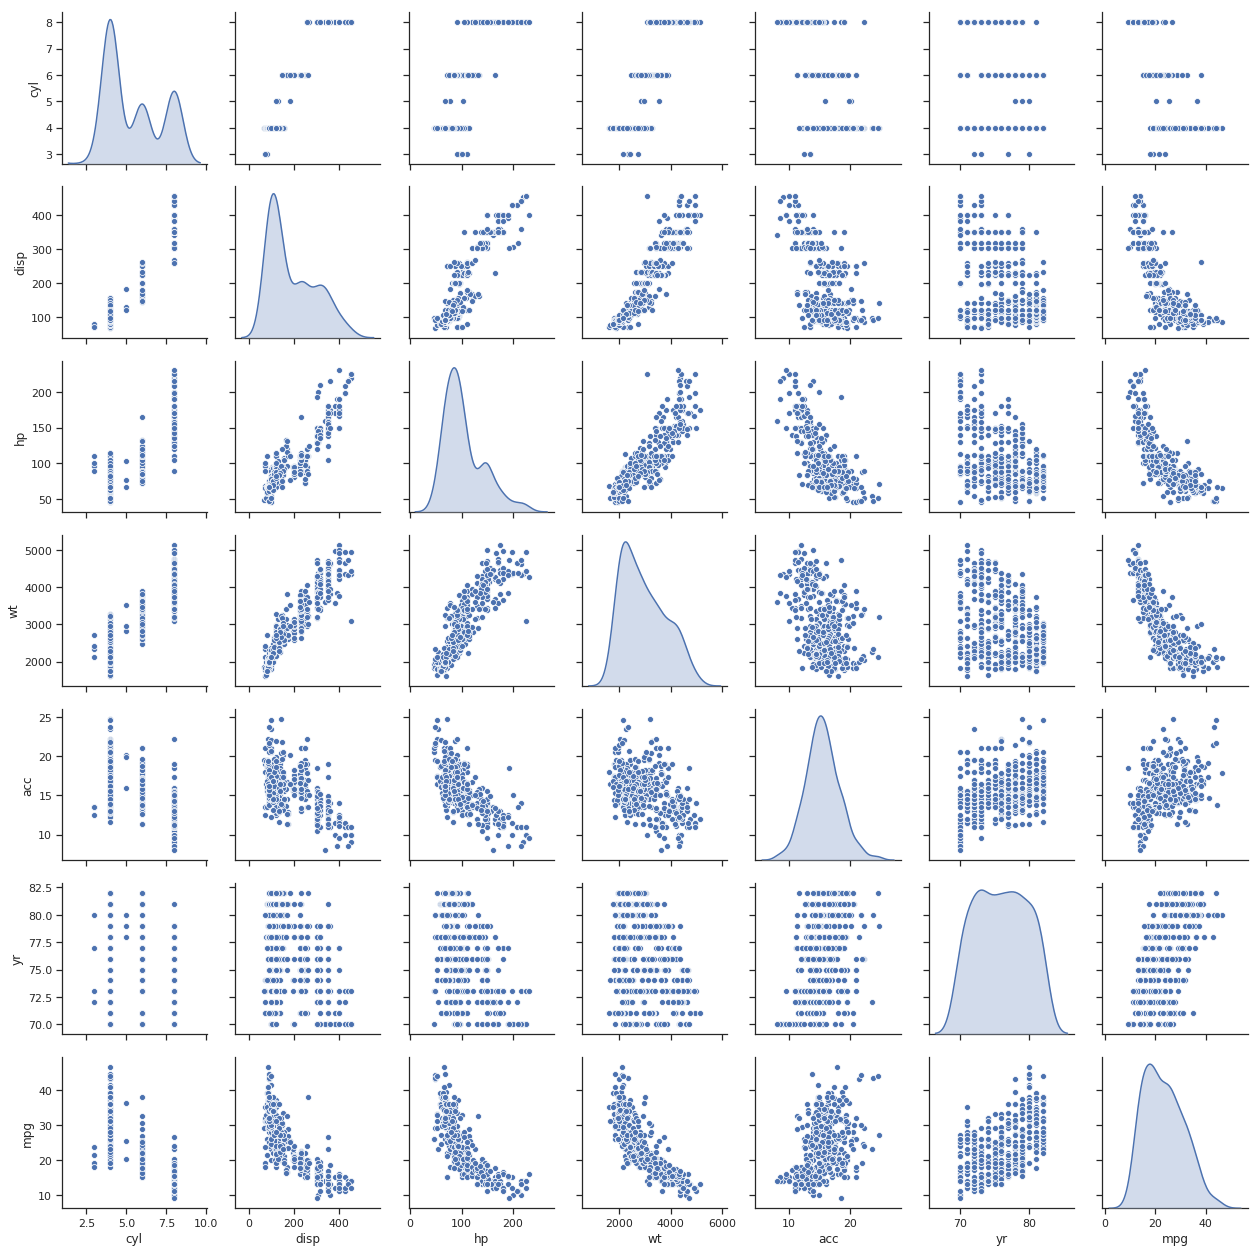

In [10]:
sns.pairplot(data, diag_kind ='kde')

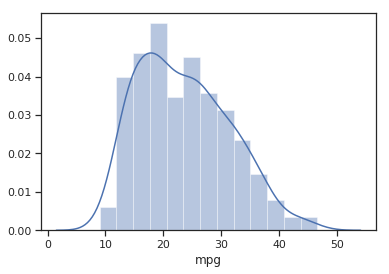

In [11]:
sns.distplot(data['mpg'])

In [12]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


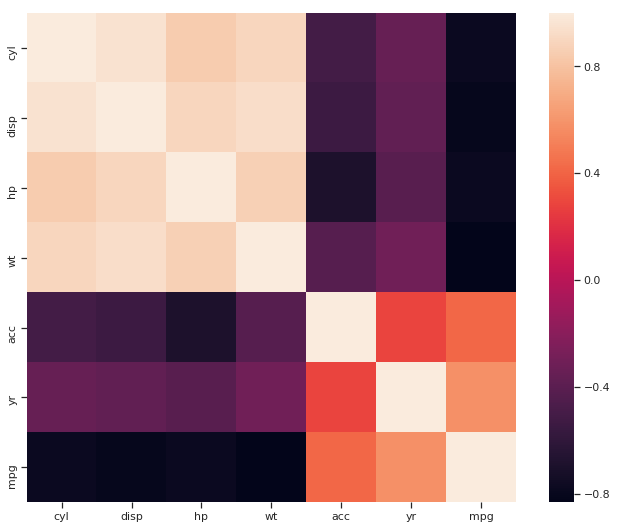

In [13]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [0]:
#Accelation of a vehicle models is an independent of other.
#As number of Cylinder/Horsepower increase, we can positive impact/increase in Horsepower/Cylinder and weight.
#Mileage/Weight is inversly proprtional to Cylinder/Horsepower.

In [14]:
numeric_cols = data.drop('car name', axis=1)

car_names = pd.DataFrame(data[['car name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
data = numeric_cols.join(car_names)   

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


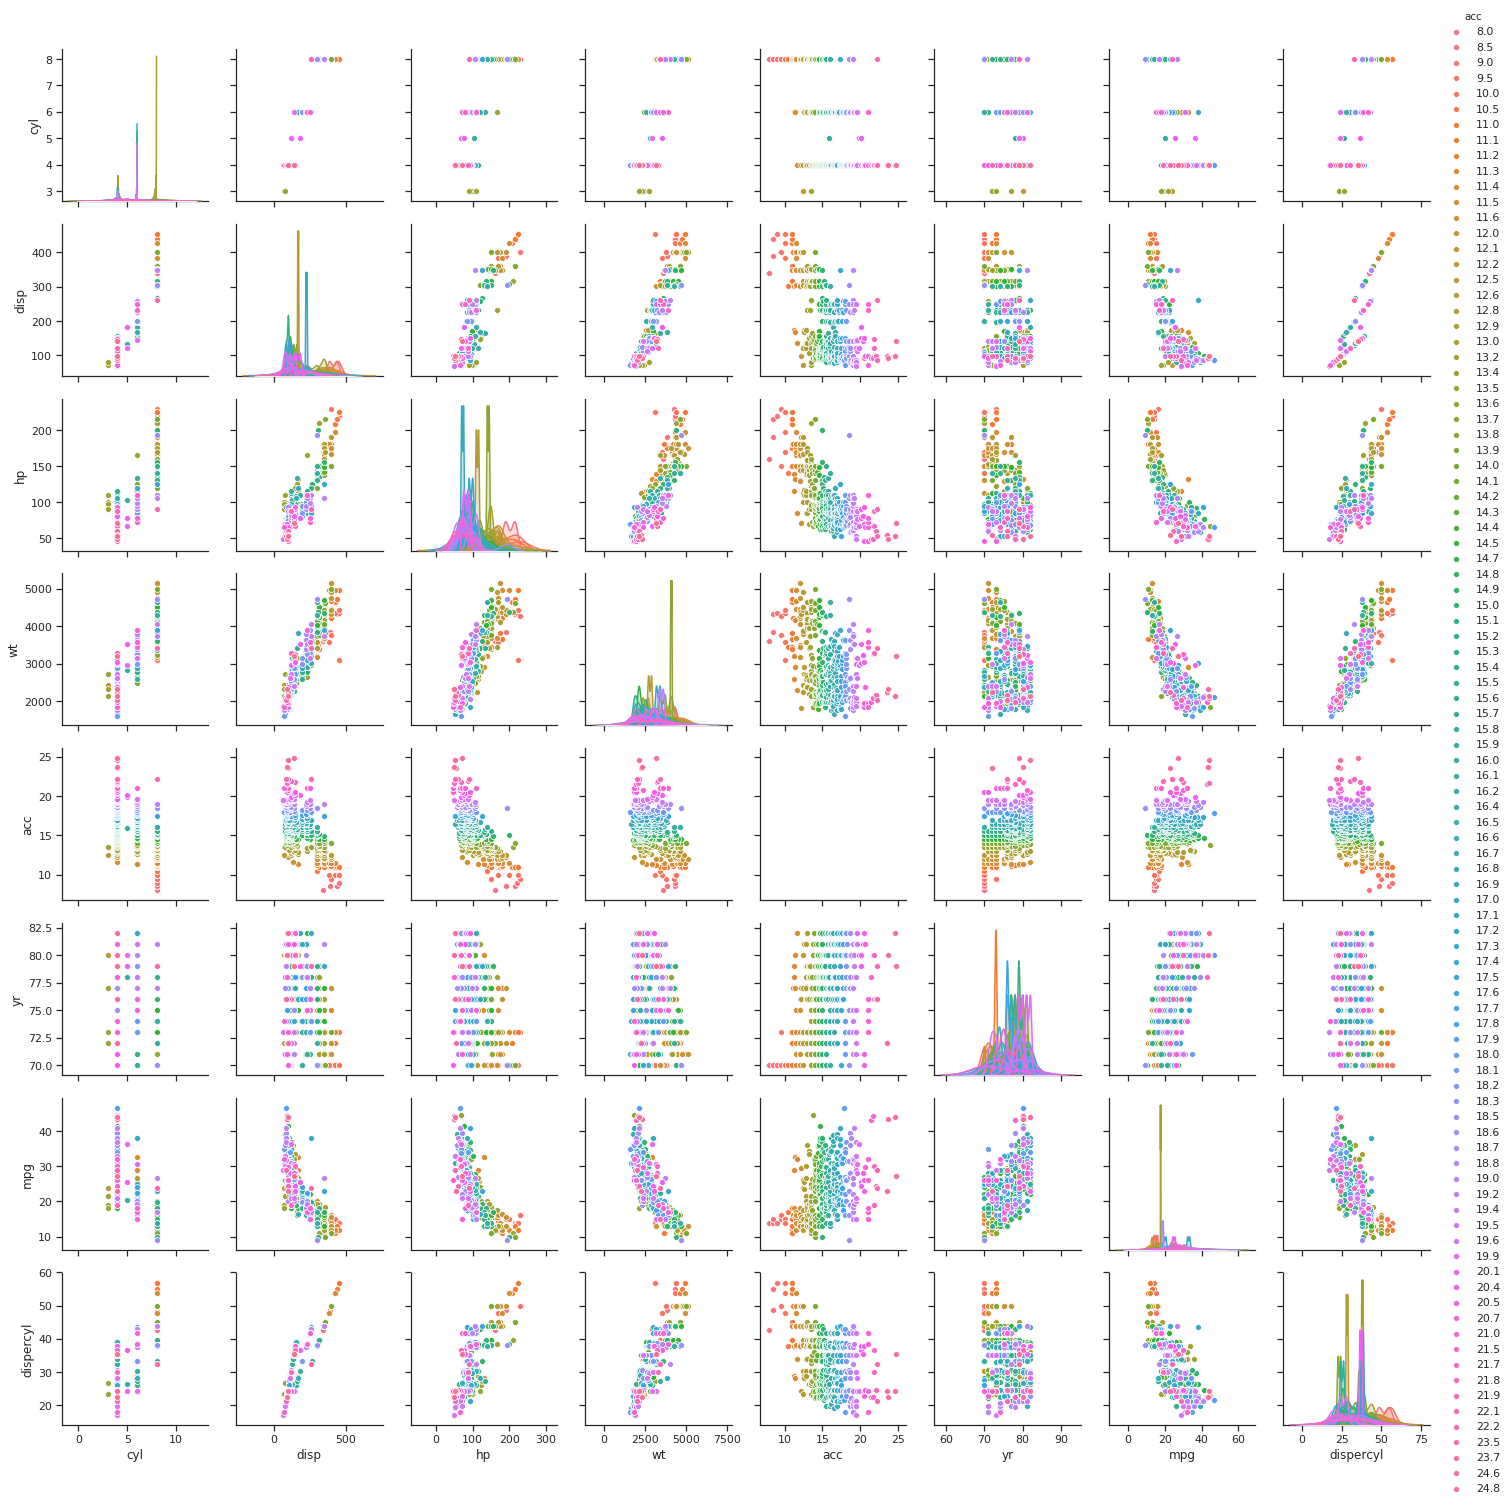

In [15]:
cars_df_attr = data.iloc[:, 0:7]
cars_df_attr['dispercyl'] = cars_df_attr['disp'] / cars_df_attr['cyl']
sns.pairplot(cars_df_attr, diag_kind='kde', hue = 'acc')

In [16]:
from scipy.stats import zscore

cars_df_attr = data.loc[:, 'cyl':'mpg']
cars_df_attr

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0
5,8,429.0,198.0,4341,10.0,70,15.0
6,8,454.0,220.0,4354,9.0,70,14.0
7,8,440.0,215.0,4312,8.5,70,14.0
8,8,455.0,225.0,4425,10.0,70,14.0
9,8,390.0,190.0,3850,8.5,70,15.0


In [0]:
cars_df_attr_z = cars_df_attr.apply(zscore)
     # Removing  year column
cars_df_attr_z.pop('yr')
array = cars_df_attr_z.values

In [0]:
#KMeans Clustering

In [18]:
cluster_range = range( 2, 8)   # expect 4 to 5 clusters from the plot showing 2 to 8
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
  cluster_sil_scores.append(metrics.silhouette_score(cars_df_attr_z, labels, metric='euclidean'))
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors,"Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,7.429910e+07,0.469829
1,3,3.420799e+07,0.335123
2,4,1.905160e+07,0.199671
3,5,1.376961e+07,0.153402
4,6,1.029191e+07,0.098656
5,7,7.718966e+06,0.054446


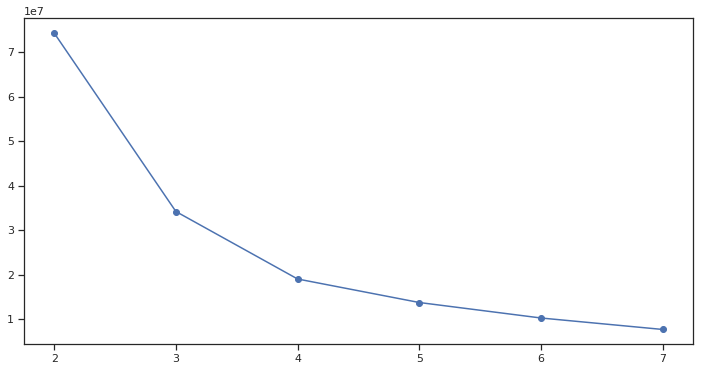

In [19]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
#the elbow plot shows there are likely 3 to 4 culusters 


In [0]:
#taking 3 clusters

In [0]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(cars_df_attr_z)
cars_df_attr_z_copy = cars_df_attr_z.copy(deep = True)

In [21]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.4860546 ,  1.48450715,  1.50624078,  1.38753374, -1.06267868,
        -1.15110476],
       [-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.75394661],
       [ 0.34598334,  0.23689416, -0.06773972,  0.29795187,  0.30089004,
        -0.47244453]])

In [22]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_df_attr_z) )
centroid_df

,cyl,disp,hp,wt,acc,mpg
0,1.486055,1.484507,1.506241,1.387534,-1.062679,-1.151105
1,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.753947
2,0.345983,0.236894,-0.067740,0.297952,0.300890,-0.472445


In [0]:
 # create column "GROUP" to hold  the cluster id of each record

In [0]:
prediction=cluster.predict(cars_df_attr_z)
cars_df_attr_z["GROUP"] = prediction    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf5250cf98>,
      dtype=object)

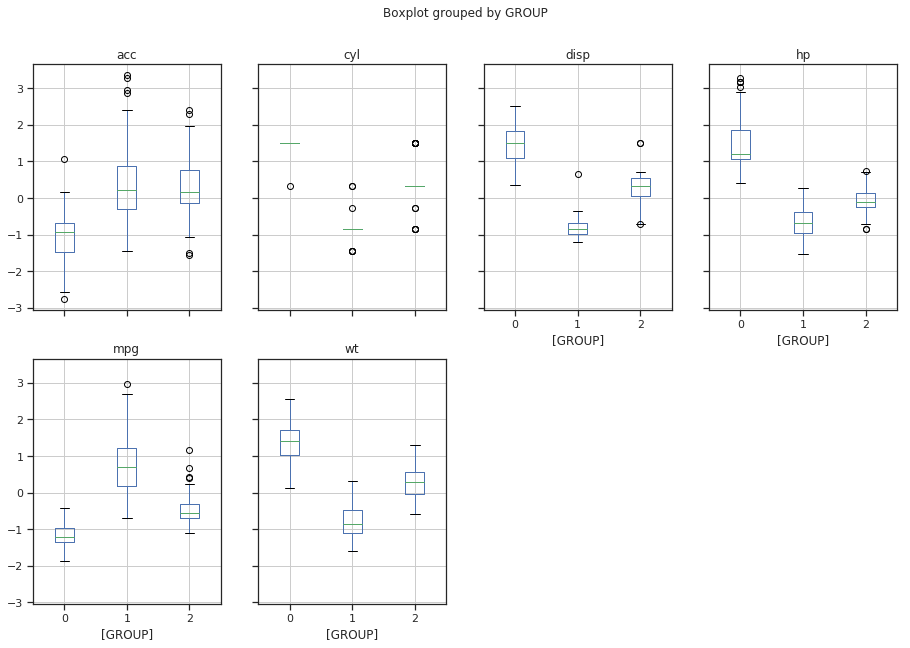

In [24]:
import matplotlib.pylab as plt

cars_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [25]:
data1 = cars_df_attr_z   
       
def replace(group):
    median, std = group.median(), group.std() 
    outliers = (group - median).abs() > 2*std 
    group[outliers] = group.median()       
    return group

data_corrected = (data1.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_df_attr_z['GROUP']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf527f1a90>,
      dtype=object)

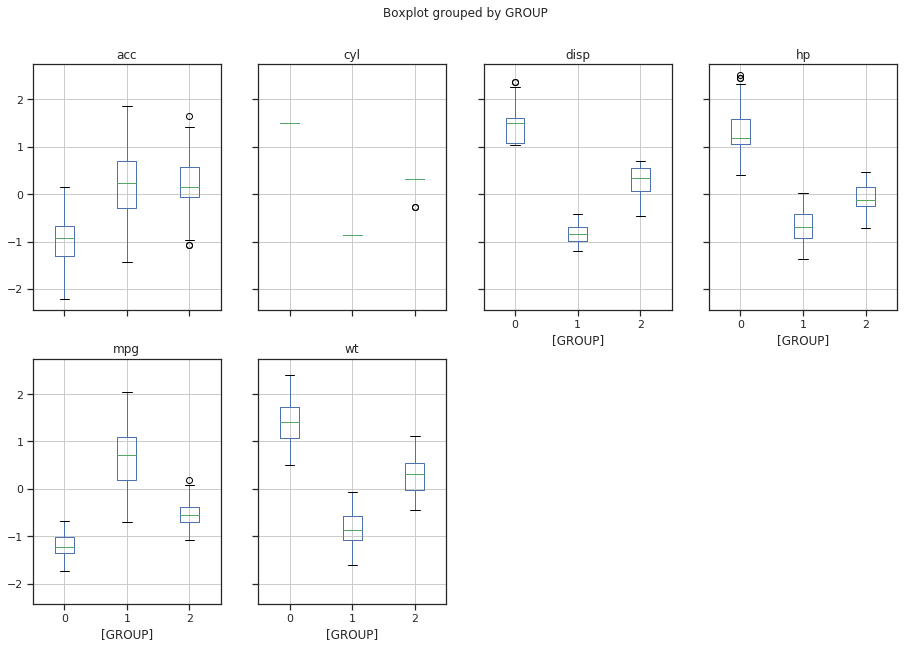

In [26]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

In [0]:
#The new outliers would be much closer to the centre

In [28]:
data

,cyl,disp,hp,wt,acc,yr,mpg,car name
0,8,307.0,130.0,3504,12.0,70,18.0,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,15.0,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,18.0,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,16.0,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,17.0,ford torino
5,8,429.0,198.0,4341,10.0,70,15.0,ford galaxie 500
6,8,454.0,220.0,4354,9.0,70,14.0,chevrolet impala
7,8,440.0,215.0,4312,8.5,70,14.0,plymouth fury iii
8,8,455.0,225.0,4425,10.0,70,14.0,pontiac catalina
9,8,390.0,190.0,3850,8.5,70,15.0,amc ambassador dpl


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [0]:
factors = ['cyl','disp','hp','acc','wt','yr']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

In [0]:
X = StandardScaler().fit_transform(X)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [0]:
regressor = LinearRegression()

In [32]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [33]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predicted = regressor.predict(X_test)

In [35]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.433500527518434

In [36]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
gb_regressor.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [0]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [39]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.7052785799211354

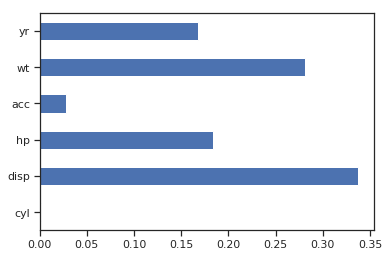

In [40]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()